In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [0]:
file_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1AV-A1uhQqvF6h0_a-fupFQIHv6W7-vNm88AYh_WzeB0/export?format=csv&gid=1646189991',header=None)


In [0]:
file_data.columns = ['A','B','C']

In [8]:
file_data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


#Analyze

In [14]:
file_data.mean()

A     2.317009
B     2.013115
C   -41.564919
dtype: float64

In [15]:
file_data.median()

A    0.4685
B    1.9350
C   -3.0900
dtype: float64

This differenc can be due to the presence of an outlier while measuring C

In [16]:
file_data['C'].min()

-10000.0

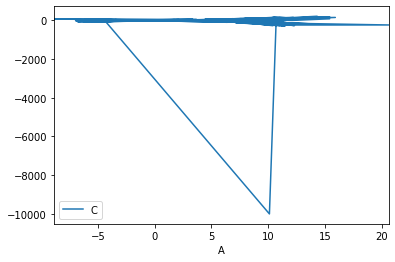

In [13]:
file_data.plot(x='A',y='C')

We see an outlier when C = -10000. We need to remove it as it will affect our model's performance

In [0]:
file_data = file_data[file_data['C']!=-10000]

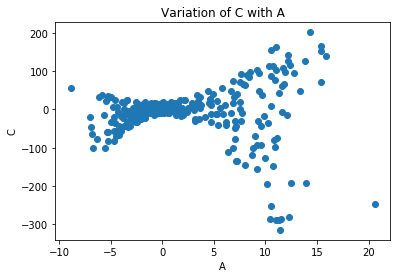

In [23]:
_=plt.scatter(file_data['A'],file_data['C'])
_=plt.xlabel('A')
_=plt.ylabel('C')
_=plt.title('Variation of C with A')

From this scatterplot, it is evident that we cannot calculate the value of C from the value of A alone. A linear relationship between A and C is not currently visible.

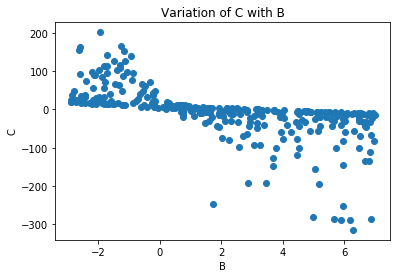

In [25]:
_=plt.scatter(file_data['B'],file_data['C'])
_=plt.xlabel('B')
_=plt.ylabel('C')
_=plt.title('Variation of C with B')

From this plot, we can see that most values of C lie close to 0 irrespective of the value of B. Also, when B<1, the value of C tends to be greater than 0 while C tends to be in the negative range when B>1.

From the plots above, we find that the scales/range of A and B differ. Hence to eliminate the effect of these scales on our model, we will normalize the data -> Getting their scale to [0,1]

In [26]:
file_data = (file_data - file_data.mean())/file_data.std()
file_data.head()

,A,B,C
0,-0.316690,-0.737365,0.277041
1,-0.650791,-1.088118,0.281248
2,-0.237033,0.829336,0.070373
3,0.224907,1.016405,-0.219300
4,-0.701786,1.631059,-0.194062


#Model

In [0]:
#Setting X as input and y as output
X = file_data.iloc[:,0:2]
y = file_data.iloc[:,2:3].values

#Since I can't use in built libraries like scikit-learn, I will use Y= beta*X where y,beta,X are matrices. beta includes beta0,beta1,beta2
# Y = beta0 + beta1*X1 + beta2*X2
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# Initializing all coefficients to 0
beta = np.zeros([1,3])

In [0]:
# I will use the gradient descent algorithm to reduce the error. Alpha denotes the rate at which we will move towards the minima (i.e step size)
alpha = 0.01
#Assuming model wil converge in 1000 iterations
iterations  = 1000

In [0]:
# Now, we need to create a function to compute the error produced by the model with the calculated coefficients.
# Cost is summation of difference between predicted value and actual value for all the values. Effectively, y-beta*X
def Cost(X,y,beta):
  error = np.power(((X @ beta.T)-y),2)
  return np.sum(error)/(2 * len(X))


In [0]:
#Next, I am creating a gradient descent algorithm
# I am storing the cost at each iteration so that I can visualize the costs later to see if my model is working well. (Cost should decrease with time)
# In each iteration, I am updating beta. After 1000 iterations, I am returning the final beta and all the cost values. 
def gradientDescent(X,y,beta,iterations,alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - y), axis=0)
        cost[i] = Cost(X, y, beta)
    
    return beta,cost


In [0]:
#Calling the gradient descent algorithm using input, output, initial beta, alpha and iterations.
coefficients,cost = gradientDescent(X,y,beta,iterations,alpha)

In [52]:
#These are the coefficients to be used
print(coefficients)

[[-4.09378960e-16 -1.08868001e-01 -6.38789467e-01]]


Intercept: close to 0,
coefficient of A : -0.1088,
coefficient of B : -0.6388

In [53]:
#Final error of the model
model_error = Cost(X,y,coefficients)
print(model_error)

0.30197556383932933


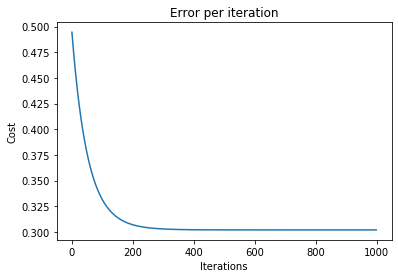

In [55]:
#Plotting cost function
iters = np.arange(iterations)
_=plt.plot(iters,cost)
_=plt.xlabel('Iterations')
_=plt.ylabel('Cost')
_=plt.title('Error per iteration')

Equation of model is :
C = -0.1088*A - 0.6388*B   (Since intercept is close to 0)